# Load Data

In [1]:
import matplotlib.pyplot as plt
import scipy.io as sio

img_mat = sio.loadmat("regimages.mat")
img = img_mat["regimages"]
acquisition_data_mat = sio.loadmat("acquisitionData.mat")
acquisition_data = acquisition_data_mat["acquisitionData"]

# Plot Contrast Enhancement Curves

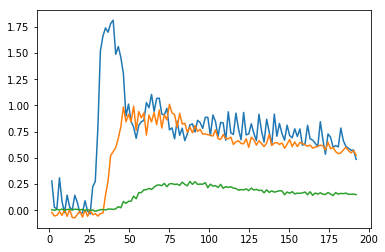

In [20]:
import numpy as np
import perfusion as p
from perfusion import signal_contrast as sc
from perfusion import models as m

art_contrast = sc.art_signal_to_contrast(acquisition_data)
pv_contrast = sc.pv_signal_to_contrast(acquisition_data)
allts = np.asscalar(acquisition_data["allts"])
times = allts[:, 0]

signal = img[32, 99, 29, :]
contrast = sc.signal_to_contrast(signal, acquisition_data)

xdata = np.vstack((times, art_contrast, pv_contrast)).transpose()

plt.plot(times, art_contrast)
plt.plot(times, pv_contrast)
plt.plot(times, contrast)
# %reload_ext line_profiler
# %lprun -f m.disc m.disc(times, art_contrast, pv_contrast, 0.25, 0.17, 9, 5, 2)

# Fit Curve

In [19]:
from perfusion import optimize as opt
import scipy.optimize as sopt

xdata = xdata.astype(np.float32)
bounds = ([0, 0, 1, 0, 0], [1, 1, 100, 15, 7])

x, cov = sopt.curve_fit(m.disc, xdata, contrast, p0=[0.2, 0.2, 10, 5, 5])
print(x)
print(cov)

[ 0.31065457  8.64823123 45.45526068  5.          5.        ]
[[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]
